In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SmartSales").getOrCreate()
spark

In [7]:
df_sales = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("smart-store-koreysells/data/raw/sales_data.csv")

df_sales.createOrReplaceTempView("sales")
df_sales.show(5)

+-------------+---------+----------+---------+-------+----------+----------+---------------+-----------+
|TransactionID| SaleDate|CustomerID|ProductID|StoreID|CampaignID|SaleAmount|DiscountPercent|PaymentType|
+-------------+---------+----------+---------+-------+----------+----------+---------------+-----------+
|          550| 1/6/2024|      1008|      102|    404|         0|      39.1|            5.0|     Credit|
|          551| 1/6/2024|      1009|      105|    403|         0|     19.78|           10.0|       Cash|
|          552|1/16/2024|      1004|      107|    404|         0|     335.1|            5.0|     Credit|
|          553|1/16/2024|      1006|      102|    406|         0|     195.5|            5.0|     Credit|
|          554|1/25/2024|      1005|      102|    405|         0|     117.3|            5.0|     Credit|
+-------------+---------+----------+---------+-------+----------+----------+---------------+-----------+
only showing top 5 rows



In [9]:
df_sales.createOrReplaceTempView("sales")

In [12]:
df_top_customers = spark.sql("""
SELECT CustomerID, SUM(SaleAmount) AS total_spent
FROM sales
GROUP BY CustomerID
ORDER BY total_spent DESC
""")

df_top_customers.show(10)

+----------+------------------+
|CustomerID|       total_spent|
+----------+------------------+
|      1001|23752.520000000004|
|      1010|          22822.54|
|      1007|           12422.6|
|      1004|11813.439999999999|
|      1006|          11715.82|
|      1011|           8750.94|
|      1002|           7434.44|
|      1005|4064.8599999999997|
|      1003|2427.2999999999997|
|      1009|           1806.34|
+----------+------------------+
only showing top 10 rows



In [9]:
from pyspark.sql import SparkSession

# Start or reuse Spark
spark = SparkSession.builder.appName("SmartSales").getOrCreate()

# Load SALES data
df_sales = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("smart-store-koreysells/data/raw/sales_data.csv")

df_sales.createOrReplaceTempView("sales")

# Load CUSTOMERS data
df_customers = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("smart-store-koreysells/data/raw/customers_data.csv")

df_customers.createOrReplaceTempView("customers")

In [12]:
# Query Top Customers (corrected column name)
df_top_customers = spark.sql("""
SELECT CustomerID, SUM(SaleAmount) AS total_spent
FROM sales
GROUP BY CustomerID
ORDER BY total_spent DESC
""")

df_top_customers.show(10)

+----------+------------------+
|CustomerID|       total_spent|
+----------+------------------+
|      1001|23752.520000000004|
|      1010|          22822.54|
|      1007|           12422.6|
|      1004|11813.439999999999|
|      1006|          11715.82|
|      1011|           8750.94|
|      1002|           7434.44|
|      1005|4064.8599999999997|
|      1003|2427.2999999999997|
|      1009|           1806.34|
+----------+------------------+
only showing top 10 rows



In [13]:
# Slice: Filter sales by date (example: sales after 2023-01-01)
df_filtered_sales = df_sales.filter(df_sales.SaleDate >= "2023-01-01")

# Dice: Group sales by ProductID and PaymentType
df_grouped = df_filtered_sales.groupBy("ProductID", "PaymentType").sum("SaleAmount")

# Show the grouped results
df_grouped.show(10)

+---------+-----------+---------------+
|ProductID|PaymentType|sum(SaleAmount)|
+---------+-----------+---------------+
|      106|     PayPal|          88.98|
|      104|       Cash|          387.9|
|      102|       Cash|           39.1|
|      105|     PayPal|          39.56|
|      104|   Cashcash|          689.6|
|      107|       Cash|        1072.32|
|      107|     PayPal|        1072.32|
|      107| CreditCard|         2010.6|
|      106|       Cash|         711.84|
|      105|     Credit|         178.02|
+---------+-----------+---------------+
only showing top 10 rows



In [14]:
from pyspark.sql.functions import year, quarter, month

# Add Year, Quarter, Month columns based on SaleDate
df_sales = df_sales.withColumn("Year", year(df_sales.SaleDate))
df_sales = df_sales.withColumn("Quarter", quarter(df_sales.SaleDate))
df_sales = df_sales.withColumn("Month", month(df_sales.SaleDate))

# Group by Year, Quarter, Month and sum SaleAmount
df_drilldown = df_sales.groupBy("Year", "Quarter", "Month").sum("SaleAmount")

# Show results
df_drilldown.show(20)

+----+-------+-----+------------------+
|Year|Quarter|Month|   sum(SaleAmount)|
+----+-------+-----+------------------+
|NULL|   NULL| NULL|108556.34000000004|
+----+-------+-----+------------------+



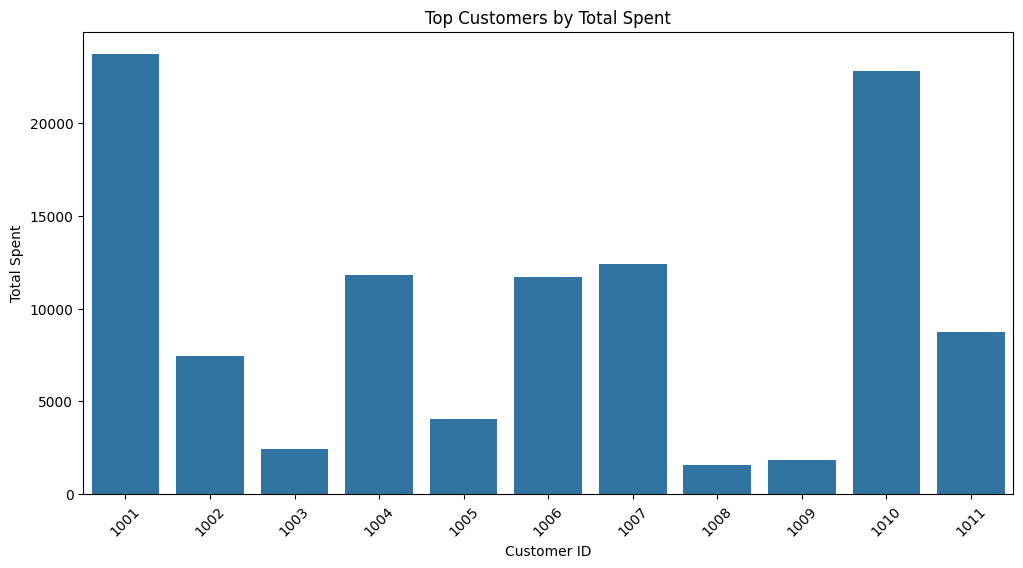

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame
df_top_customers_pd = df_top_customers.toPandas()

# Plot Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_top_customers_pd, x="CustomerID", y="total_spent")
plt.xticks(rotation=45)
plt.title("Top Customers by Total Spent")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent")
plt.show()

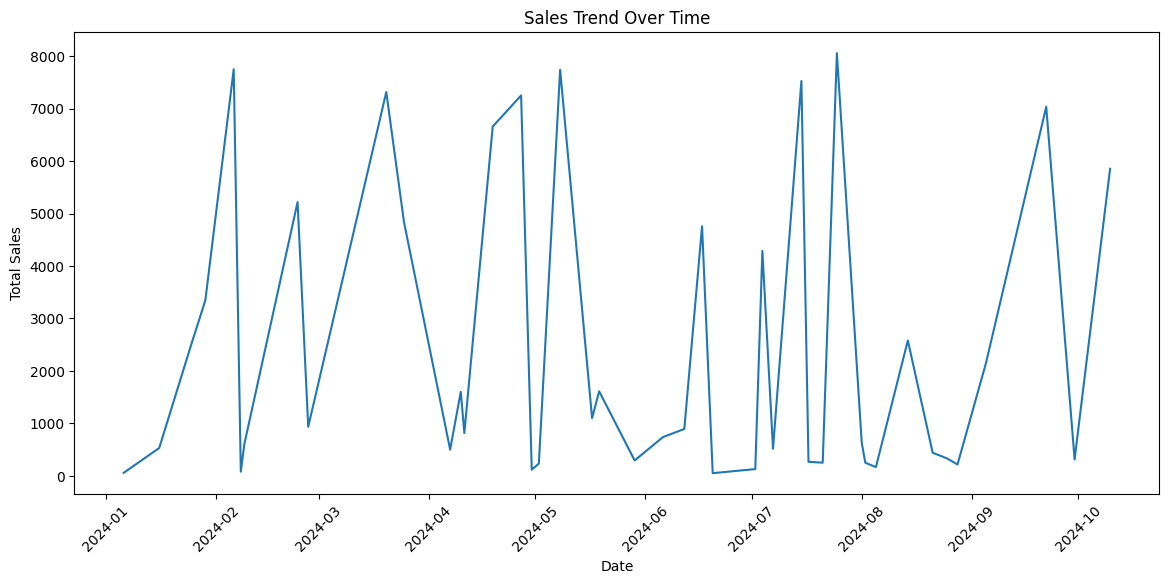

In [14]:
# Prepare sales trend data
df_sales_pd = df_sales.toPandas()

# Convert SaleDate to datetime
df_sales_pd['SaleDate'] = pd.to_datetime(df_sales_pd['SaleDate'])

# Group by SaleDate and sum SaleAmount
df_sales_trend = df_sales_pd.groupby('SaleDate')['SaleAmount'].sum().reset_index()

# Plot Line Chart
plt.figure(figsize=(14,6))
sns.lineplot(data=df_sales_trend, x="SaleDate", y="SaleAmount")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()